**Author: John Paul Goodman**

**Course: ISyE 6644**

**Semester: Fall 2021** 

**Project Group: 40** 


# Overview

-----------------

For the class project, I've chosen to create a library of random variate generation routines roughly similar to what you might find in Numpy's Random library. One of the reasons I like the numpy library is how easy it is to use and the goal for my library is to emulate that ease of use. While numpy has many nice random variate routines, I've chosen to not emulate the routines in numpy exactly. For example: the numpy Weibull routine only takes the shape parameter, while my routine takes a shape and scale parameters (as shown in the class lectures). Additionally, Numpy does not have an Erlang routine, while mine does. 

Finally, once completed, I would like to turn this library into a [pip](https://pip.pypa.io/en/stable/) installable package. ([How to: Build your first pip package](https://dzone.com/articles/executable-package-pip-install))

**Github Repo** [https://github.com/jgoodie/randomvariates](https://github.com/jgoodie/randomvariates)

-----------------
# Completed

**Below is a list of what is currently completed**

* various helper functions to set, get and generate random seeds
* Random Number Generator (["Squares: A Fast Counter-Based RNG" - Bernard Widynski 2021](https://arxiv.org/pdf/2004.06278.pdf))
* Uniform (linear congruential generator)
* Normal
* Exponential
* Erlang
* Weibull
* Triangular
* Poisson
* Gamma
    * ("A Simple Method for Generating Gamma Variables" - Marsaglia & Tsang 2000): https://dl.acm.org/doi/10.1145/358407.358414
* Chisquared
* NegBin
* Geometric
* Bernoulli
* Binomial
* D&D Dice Toss


# To Do:

**Depending on time, I would like to try to implement the following:**

* Hypergeometric
* Beta
* Others... ? 


------------------
# Demo of currently implemented routines

To use the RV library, we need to first import the library. In this example, we need to add the path to the RV.py file to the python module search path by importing the sys module and running sys.path.append("../../")

Once the RV library has been turned into a pip installable package, we won't need to add the library to the path.

Note: We are importing "RandomVariates" from the RV module.

In [4]:
import sys
sys.path.append("../../")

# import numpy as np
from RV import RandomVariates
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Next, once the library has been imported, we can create an instance of our RV class. To do that we simply call RandomVariates and assign it to a variable.

In [5]:
rv = RandomVariates()

Next, we can get and set the seed with the get_seed() and set_seed() methods. By default, when a class instance is instantiated, the seed is not set. When the seed is not set, the random variate generators will randomly produce variates. Initially, setting the seed to 'None' produces random variates each time the class instance is called.

Note: The Squares PRN mentioned above handles the generation of random seeds. 

To get the seed, simply call the get_seed() method:

In [3]:
print(rv.get_seed()) 

None


To set a seed value, we can simply call the set_seed() method:

In [4]:
rv.set_seed(42)
print(rv.get_seed())

42


In [5]:
rv.set_seed(None)
print(rv.get_seed()) 

None


## Squares PRNG

As mentioned above, while doing some research for this project, I found a 2021 paper by Bernard Widynski demonstratign a "new counter-based random number generator (RNG) based on John von Neumann’s middle square."

While it was discussed in lecture that the von Neumann Mid-Square Method was pretty lousy and bad, this new method does seem to generate some nice pseudo-random numbers and at the very least it helped me solve my random seed problem.

To generate a pseudo-random number from this RNG, simply call the squaresrng() method. The squaresrng() takes two variables: the center and the key:

In [6]:
rv.squaresrng(ctr=1, key=4)

4332296397063773219434262753256957079832647486336184593585908044698308193867781871495087223398383770446961678859909192630971974912311296

To further take advantage of the Squares RNG, I've created a function that randomly generates "smaller" numbers:

In [7]:
rv.randseed()

73517596426

Let's check to see if we can see any "funkiness" with these PRNs:

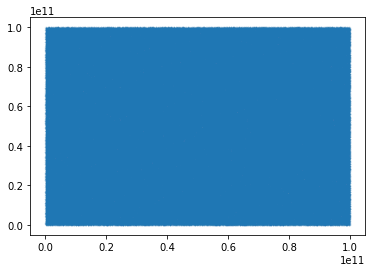

In [8]:
x = [rv.randseed() for _ in range(1000000)]
y = [rv.randseed() for _ in range(1000000)]

plt.scatter(x, y, s=0.4, alpha=0.1)
plt.show()

## Uniform Random Variates

To generate uniform random variates, we can call the uniform() method. 

In [9]:
rv.uniform()

array([0.09560373])

In [18]:
rv.uniform(n=10)

array([0.43402048, 0.58214269, 0.07219086, 0.31185984, 0.42824826,
       0.56858247, 0.16557097, 0.7513672 , 0.22846081, 0.74077532])

By default, the uniform() method generates Unif(0,1), but we can also specify other ranges:

In [15]:
rv.uniform(2,4, n=10) # Unif(2,4)

array([3.35384235, 2.028445  , 2.075128  , 2.67630045, 2.58160967,
       3.11366685, 3.39882167, 3.99574982, 2.56722511, 3.352362  ])

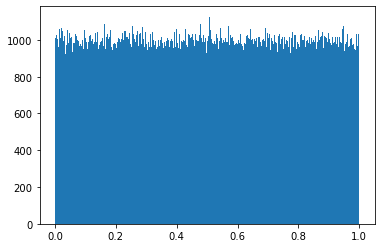

In [17]:
unifs = rv.uniform(n=1000000)

plt.hist(unifs, bins=1000)
plt.show()

Let's plot things in 3D to see if we have any "RANDU" beahvior:

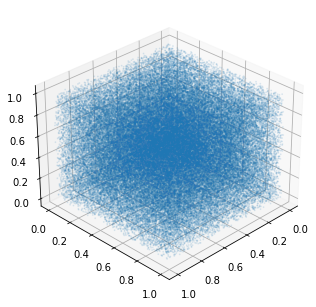

In [16]:
x = RandomVariates()
x.set_seed(1)

y = RandomVariates()
y.set_seed(2)

z = RandomVariates()
z.set_seed(3)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False, azim=45)
fig.add_axes(ax)

sequence_containing_x_vals = x.uniform(n=100000)
sequence_containing_y_vals = y.uniform(n=100000)
sequence_containing_z_vals = z.uniform(n=100000)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, s=0.8, alpha=0.1)
plt.show()

## Normal Random Variates

To generate normal random variates, we use the norm() method. By default the norm() method generates Nor(0,1) random variates. Note that the norm() function takes a stardard deviation rather than a variance.

In [19]:
rv.norm()

array([0.04418552])

In [21]:
rv.norm(mu=2, sd=1, n=10) # mean = 2, std dev = 1

array([0.54503461, 3.00076019, 1.89554192, 2.82644196, 1.69774873,
       2.59851473, 1.31588562, 2.44663424, 1.53532401, 2.66113006])

Check the mean, standard deviation and variance

In [26]:
import statistics
z = rv.norm(mu=0, sd=2, n=1000000)
print(statistics.mean(z))
print(statistics.stdev(z))
print(statistics.variance(z))

-0.002723861517146957
2.0020491810446885
4.008200923321708


Check that our distribution does indeed look normal

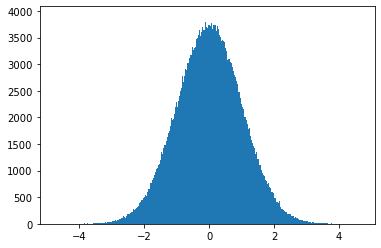

In [27]:
z = rv.norm(mu=0, sd=1, n=1000000)
plt.hist(z, bins=1000)
plt.show()

## Exponential Random Variates

To generate exponential random variates, we can call the exponential() method. 

Note that when specifying labmda, it is calculated as 1/lambda witin the function. For example lam=3 is 1/3

In [6]:
rv.exponential(lam=3, n=10) # Lambda = 1/3

array([0.07076798, 0.66094698, 0.01831046, 0.13468741, 0.3083684 ,
       0.0733518 , 0.55993533, 0.00159952, 0.2031797 , 0.39254961])

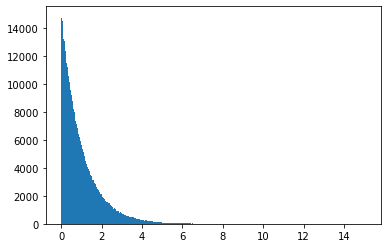

In [7]:
z = rv.exponential(lam=1, n=1000000)
plt.hist(z, bins=1000)
plt.show()

## Erlang Random Variates

To generate erlang random variates, we can call the erlang() method. 

Note that when specifying labmda, it is calculated as 1/lambda witin the function. For example lam=3 is 1/3.
Also, note that the erlang() method takes a shape paramter of "k"

In [ ]:
rv.erlang(lam=1, k=1, n=10)

array([0.78304857, 0.02212619, 1.56521495, 0.94945188, 0.65364594,
       2.38581782, 0.74607507, 1.25110632, 0.0389219 , 0.89992999])

 When lambda and k are equal to 1, we get an exponential

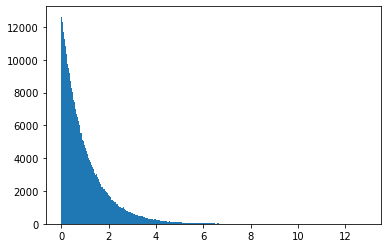

In [9]:
z = rv.erlang(lam=1, k=1, n=1000000)
plt.hist(z, bins=1000)
plt.show()

Lambda equal to 1 and k equal to 10

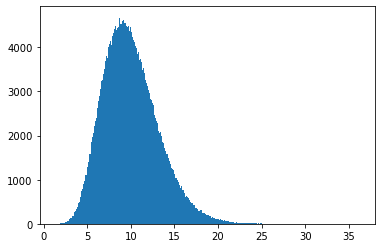

In [12]:
z = rv.erlang(lam=1, k=10, n=1000000)
plt.hist(z, bins=1000)
plt.show()

## Weibull Random Variates

To generate weibull random variates, we can call the weibull() method. 

Note that when specifying labmda, it is calculated as 1/lambda witin the function. For example lam=3 is 1/3.
Also, note that the weibull() method takes a shape paramter of "beta"

In [14]:
rv.weibull(lam=2,beta=2,n=10)

array([0.39730318, 0.26567041, 0.06535435, 0.55214449, 0.33246476,
       0.56789567, 0.49556108, 0.61836596, 0.73704929, 0.54957916])

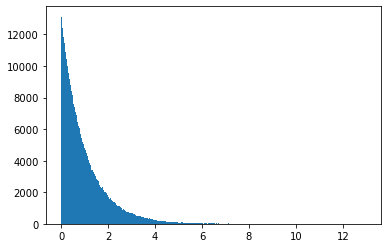

In [15]:
w = rv.weibull(lam=1,beta=1,n=1000000)
plt.hist(w, bins=1000)
plt.show()

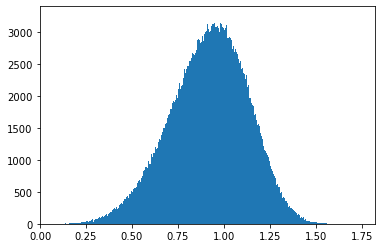

In [16]:
w = rv.weibull(lam=1,beta=5,n=1000000)
plt.hist(w, bins=1000)
plt.show()

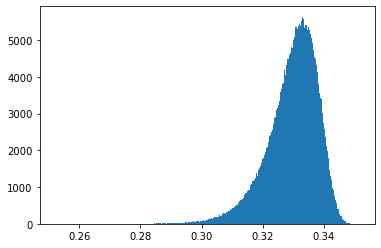

In [17]:
w = rv.weibull(lam=3,beta=50,n=1000000)
plt.hist(w, bins=1000)
plt.show()

## Triangular Random Variates

To generate triangular random variates, we can call the triangular() method. 

The triangular method takes a lower bound "a", a mode value of "b" and an upper bound of "c". 

In [18]:
rv.triangular(a=0, b=1, c=2, n=10)

array([0.56128633, 0.95739151, 1.14616232, 1.02278609, 0.45319052,
       1.61194954, 1.07739258, 1.56047044, 1.06140021, 1.32514496])

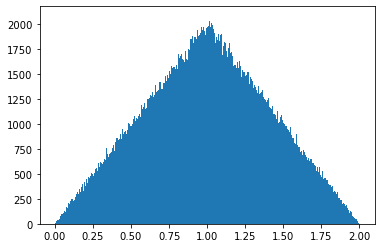

In [19]:
t = rv.triangular(a=0, b=1, c=2, n=1000000)
plt.hist(t, bins=1000)
plt.show()

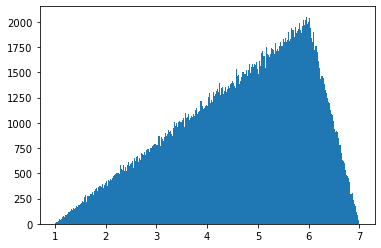

In [21]:
t = rv.triangular(a=1, b=6, c=7, n=1000000)
plt.hist(t, bins=1000)
plt.show()